In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

3


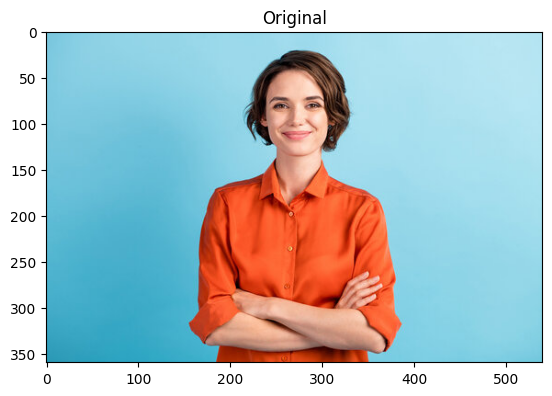

In [2]:
img = Image.open("woman.jpeg")
img = np.array(img)
print(img.shape[2])
img_rgb = []
for i in range(img.shape[2]):
    img_rgb.append(img[:,:,i])

plt.title("Original")
plt.imshow(img)
plt.show()

## Downsampling

In [3]:
def max_downsampling(matrix, kernel=3, stride=3):
    h, w = matrix.shape
    output_dim = (h // stride, w // stride)
    output = np.zeros(output_dim, dtype=int)

    for i in range(0, h-kernel+1, stride):
        for j in range(0, w-kernel+1, stride):
            region = matrix[i:i+kernel, j:j+kernel]
            output[i//stride, j//stride] = np.max(region)
    
    return output

def median_downsampling(matrix, kernel=3, stride=3):
    h, w = matrix.shape
    output_dim = (h // stride, w // stride)
    output = np.zeros(output_dim, dtype=int)

    for i in range(0, h-kernel+1, stride):
        for j in range(0, w-kernel+1, stride):
            region = matrix[i:i+kernel, j:j+kernel]
            output[i//stride, j//stride] = np.median(region)
    
    return output

def mean_downsampling(matrix, kernel=3, stride=3):
    h, w = matrix.shape
    output_dim = (h // stride, w // stride)
    output = np.zeros(output_dim, dtype=int)

    for i in range(0, h-kernel+1, stride):
        for j in range(0, w-kernel+1, stride):
            region = matrix[i:i+kernel, j:j+kernel]
            output[i//stride, j//stride] = np.mean(region)
    
    return output

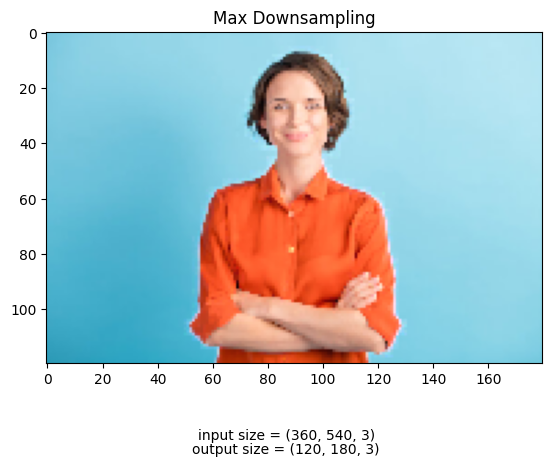

In [4]:
result_rgb = []
for i in img_rgb:
    x = max_downsampling(matrix=i)
    result_rgb.append(x)

result = np.stack(result_rgb, axis=-1)
plt.title("Max Downsampling")
plt.imshow(result)
plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

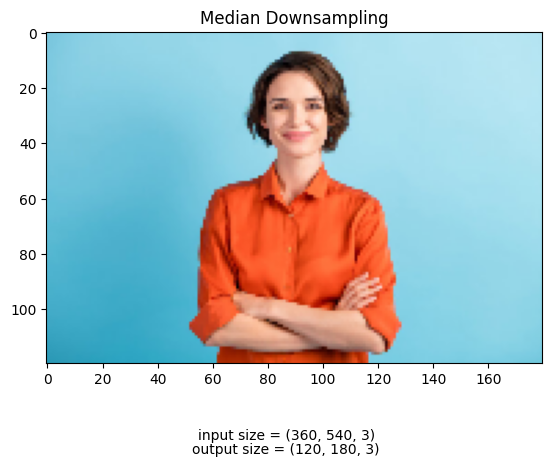

In [5]:
result_rgb = []
for i in img_rgb:
    x = median_downsampling(matrix=i)
    result_rgb.append(x)

result = np.stack(result_rgb, axis=-1)
plt.title("Median Downsampling")
plt.imshow(result)
plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

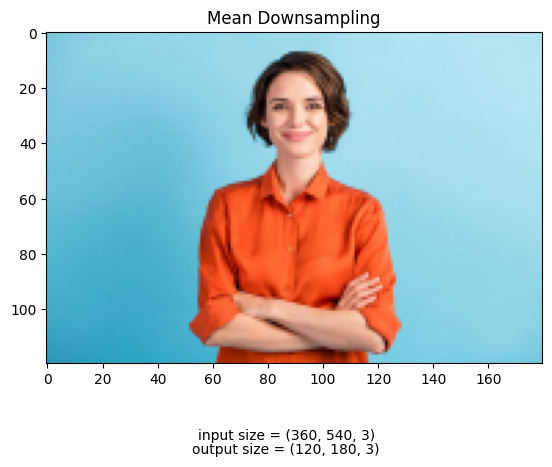

In [6]:
result_rgb = []
for i in img_rgb:
    x = mean_downsampling(matrix=i)
    result_rgb.append(x)

result = np.stack(result_rgb, axis=-1)
plt.title("Mean Downsampling")
plt.imshow(result)
plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

## Upsampling

In [72]:
def nearest_neighbor(matrix, scale=2):
    h,w = matrix.shape
    output_dim = (int(h*scale), int(w*scale))
    output = np.zeros(output_dim, dtype=matrix.dtype)
    stride_row = h / output_dim[0]
    stride_col = w / output_dim[1]

    for i in range(output_dim[0]):
        for j in range(output_dim[1]):
            old_i = int(i * stride_row)
            old_j = int(j * stride_col)
            output[i, j] = matrix[old_i, old_j]
    
    return output

# ...
def bilinear(matrix, scale=2):
    h, w = matrix.shape
    output_dim = (int(h * scale), int(w * scale))
    output = np.zeros(output_dim)

    for i_new in range(output_dim[0]):
        for j_new in range(output_dim[1]):
            x = i_new / scale
            y = j_new / scale
            
            x0 = int(np.floor(x))
            x1 = min(x0 + 1, h-1)
            y0 = int(np.floor(y))
            y1 = min(y0 + 1, w-1)
            
            dx = x - x0
            dy = y - y0
            
            output[i_new, j_new] = (
                matrix[x0, y0]*(1-dx)*(1-dy) +
                matrix[x1, y0]*dx*(1-dy) +
                matrix[x0, y1]*(1-dx)*dy +
                matrix[x1, y1]*dx*dy
            )

    return output

# ...
def cubic_kernel(t, a=-0.5):
    t = abs(t)
    if t <= 1:
        return (a + 2)*t**3 - (a + 3)*t**2 + 1
    elif t < 2:
        return a*t**3 - 5*a*t**2 + 8*a*t - 4*a
    else:
        return 0
    
def bicubic(matrix, scale=2):
    h, w = matrix.shape
    H_new, W_new = int(h*scale), int(w*scale)
    output = np.zeros((H_new, W_new), dtype=float)
    
    for i_new in range(H_new):
        for j_new in range(W_new):
            # Koordinat “real” di matriks asli
            x = i_new / scale
            y = j_new / scale
            x_int = int(np.floor(x))
            y_int = int(np.floor(y))
            
            value = 0
            for m in range(-1, 3):
                for n in range(-1, 3):
                    xi = min(max(x_int + m, 0), h-1)
                    yj = min(max(y_int + n, 0), w-1)
                    weight = cubic_kernel(x - (x_int + m)) * cubic_kernel(y - (y_int + n))
                    value += matrix[xi, yj] * weight
            output[i_new, j_new] = value
    return output


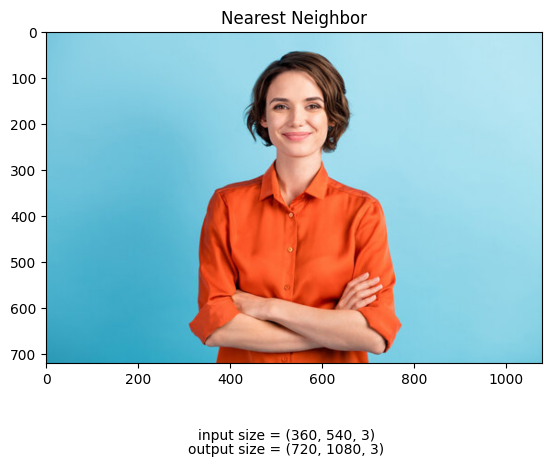

In [73]:
result_rgb = []
for i in img_rgb:
    x = nearest_neighbor(i)
    result_rgb.append(x)

result = np.stack(result_rgb, axis=-1)
plt.title("Nearest Neighbor")
plt.imshow(result)
plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

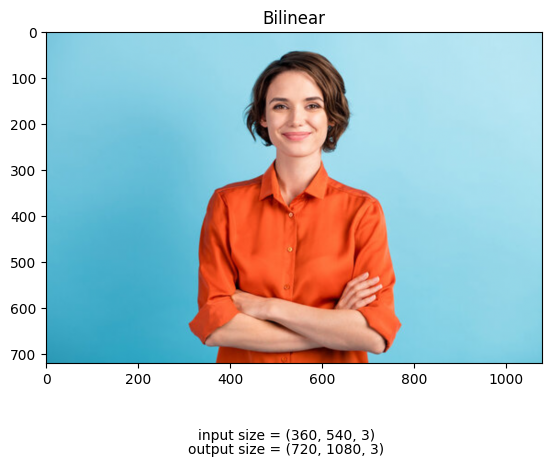

In [74]:
result_rgb = []
for i in img_rgb:
    x = bilinear(i)
    result_rgb.append(x)

result = np.stack(result_rgb, axis=-1)
plt.title("Bilinear")
plt.imshow(result/255)
plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05321691176470588..1.0329503676470588].


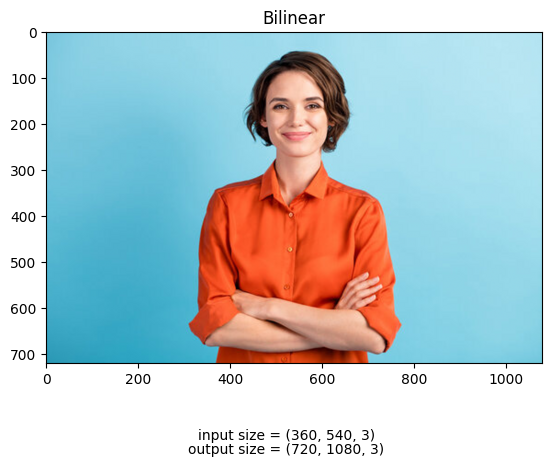

In [75]:
result_rgb = []
for i in img_rgb:
    x = bicubic(i)
    result_rgb.append(x)

result = np.stack(result_rgb, axis=-1)
plt.title("Bilinear")
plt.imshow(result/255)
plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()